<center> <font size="+1"> TP2 SIC 4102 </font> </center>

# Problème de moindre norme (système sur-déterminé)


$
\newcommand{\bA}{\mathbf{A}}
\newcommand{\bx}{\mathbf{x}}
\newcommand{\by}{\mathbf{y}}
\newcommand{\be}{\mathbf{e}}
\newcommand{\br}{\mathbf{r}}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\Argmin}{\mathrm{Argmin}}
\newcommand{\st}{\mathrm{s.t.}}
$

On considère le modèle d'observation suivant:
$$
\by = \bA\bx_0 + \be
$$
où $\bA\in\RR^{m\times n}$ est une matrice donnée, $\by$ est le vecteur d'observation, $\bx_0$ est le vecteur des vraies données à reconstituer et $\be$ est un terme de bruit perturbateur.

On suppose $m\geq n$, c'est-à-dire plus d'observations que d'inconnues et on s'intéresse au problème:
$$
\Argmin_\bx \Phi(\br) = \sum_{i=1}^m \phi(r_i) \quad \st \quad \br=\by-\bA\bx
$$
pour différentes fonctions $\phi$ données ci-dessous:
- $\phi(.) = (.)^2$ : on a alors le problème de moindre norme $\ell_2$,
- $\phi(.) = |.|$ : on a alors le problème de moindre norme $\ell_1$,
- $\phi(.) = $ est la fonction "dead-zone linear" ou "$\alpha$-insensitive loss.

In [ ]:
# Import de libraires
# %matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
import tp2a

Nous avons travaillé tout au long de ce TP sur le problème de moindre norme. Le système du modèle d'observation étudié est un système sur-déterminé c'est-à-dire que le nombre d'observations effectué est supérieur aux inconnues de notre problème. Nous avons programmé différents algorithmes qui nous ont permis de minimiser un certain nombre de norme et avons tracé des histogrammes des différents résidus associés à chacun des programmes.

### Approximation, problème de moindre norme

Reprogrammer la fonction `tp2a.educ.approx_l2(A, y)` qui donne $\hat{\bx}_{\ell_2}= \Argmin_{\bx}  \|\by-\bA\bx\|_2^2$.

###Code de la fonction approax_l2

In [ ]:
def approax_l2(A,y):
  x_l2 = np.linalg.lstsq(A,y)
  return x_l2

Nous avons utilisé la fonction linalg.lstsq de numpy qui permet de résoudre Ax=y en trouvant un vecteur x qui minimise la norme l2

Reprogrammer une fonction `tp2a.lpalgs.approx_l1(A, y)` qui donne $\hat{\bx}_{\ell_1} = \Argmin_{\bx}\|\by-\bA\bx\|_1$ et une fonction `approx_dzl(A, y)` qui renvoit $\hat{\bx}_{\mathrm{dzl}} = \Argmin_{\bx} \mathrm{dzl}(\by-\bA\bx)$ où $\mathrm{dzl}(u) = \max(0,|u|-\alpha)$ 

<u>Indication</u>: ces problèmes se transforment en LP et le solveur scipy.optimize.linprog pourra être utilisé avec la méthode "interior-point").

In [ ]:
## voir tp2a.lpalgs.approx_l1 / tp2a.lpalgs.approx_dzl
from scipy.optimize import linprog

###Code de la fonction approax_l1!




In [ ]:
def approax_11(A,y):
  m, n = A.shape
  c = np.concatenate((np.ones(m), np.zeros(n)))
  M = np.concatenate((-np.eye(m,m), -np.eye(m)), axis=0)
  N = np.concatenate((A,-A))
  A_b = np.concatenate((M,N), axis=1)
  b_b = np.concatenate((y,-y))
  opt = linprog(c, A_b, b_b, method='interior-point')
  x = opt.x[m:]
  value = opt.fun
  return x, value


###Code de la fonction approax_dzl

In [ ]:
def approax_dzl(A,y,alpha):
  m, n = A.shape
  c = np.concatenate((np.ones(m), np.zeros(n)))
  M = np.concatenate((-np.eye(m,m), -np.eye(m), -np.eye(m)), axis=0)
  N = np.concatenate((A,-A, np.zeros([m,n])),axis=0)
  A_b = np.concatenate((M,N), axis=1)
  b_b = np.concatenate((y+np.ones(m)*alpha, -y+np.ones(m)*alpha, np.zeros(m)))
  opt = linprog(c, A_b, b_b, method='interior-point')
  x = opt.x[m:]
  value = opt.fun
  return x, value

Tirer $\bA$ de taille $m\times n$ et $\by$ de taille $m$ aléatoirement (loi gaussienne, éléments indépendants).
Tracer l'histograme des résidus $\by-\bA\hat{\bx}_{\ell_2}$, $\by-\bA\hat{\bx}_{\ell_1}$ et $\by-\bA\hat{\bx}_{\mathrm{dzl}}$. Commenter les résultats.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


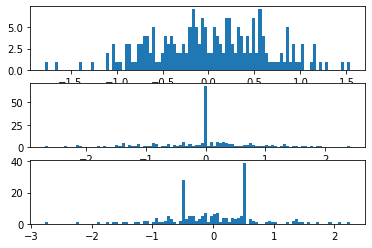

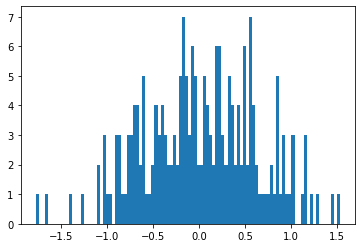

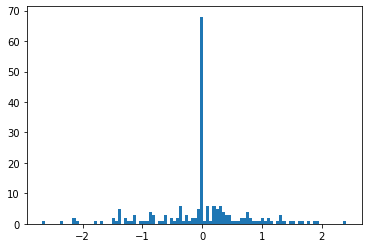

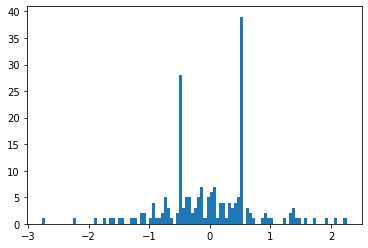

In [ ]:
m, n = 200, 100
A = np.random.randn(m,n)
y = np.random.randn(m)

xl2 = approax_l2(A,y)[0]
xl1 = approax_11(A,y)[0]
xdzl = approax_dzl(A, y, 0.5)[0]

fig, axs = plt.subplots(3,1)
_ = axs[0].hist(y - A.dot(xl2), bins=100)
_ = axs[1].hist(y - A.dot(xl1), bins=100)
_ = axs[2].hist(y - A.dot(xdzl), bins=100)

fig, axs = plt.subplots()
plt.hist(y - A.dot(xl2), bins=100)
plt.show()

plt.hist(y - A.dot(xl1), bins=100)
plt.show()

plt.hist(y - A.dot(xdzl), bins=100)
plt.show()


Comme nous pouvons le voir à travers ces histogrammes, on constate que pour une matrice aléatoire tirée aléatoirement, les résidus varient sur le type méthode implémentée. On observe de forts résidus pour la première méthode ($\by-\bA\hat{\bx}_{\ell_2}$). Par ailleurs, les résidus correspondants aux deux dernières méthodes restent relativement faibles. Pour la **norme l2**, les gros résidus sont fortement pénalisés contrairement à la **norme l1**. On en déduit que l2 est très affectée par les valeurs abérrantes